In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv("breast-cancer.csv")
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premefalse,15-19,0-2,True,3,right,left_up,False,recurrence-events
1,50-59,ge40,15-19,0-2,False,1,right,central,False,false-recurrence-events
2,50-59,ge40,35-39,0-2,False,2,left,left_low,False,recurrence-events
3,40-49,premefalse,35-39,0-2,True,3,right,left_low,True,false-recurrence-events
4,40-49,premefalse,30-34,3-5,True,2,left,right_up,False,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
267,50-59,ge40,30-34,6-8,True,2,left,left_low,False,false-recurrence-events
268,50-59,premefalse,25-29,3-5,True,2,left,left_low,True,false-recurrence-events
269,30-39,premefalse,30-34,6-8,True,2,right,right_up,False,false-recurrence-events
270,50-59,premefalse,15-19,0-2,False,2,right,left_low,False,false-recurrence-events


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           272 non-null    object
 1   mefalsepause  272 non-null    object
 2   tumor-size    272 non-null    object
 3   inv-falsedes  272 non-null    object
 4   falsede-caps  264 non-null    object
 5   deg-malig     272 non-null    int64 
 6   breast        272 non-null    object
 7   breast-quad   271 non-null    object
 8   irradiat      272 non-null    bool  
 9   class         272 non-null    object
dtypes: bool(1), int64(1), object(8)
memory usage: 19.5+ KB


In [ ]:
df.isnull().sum()

,0
age,0
mefalsepause,0
tumor-size,0
inv-falsedes,0
falsede-caps,8
deg-malig,0
breast,0
breast-quad,1
irradiat,0
class,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

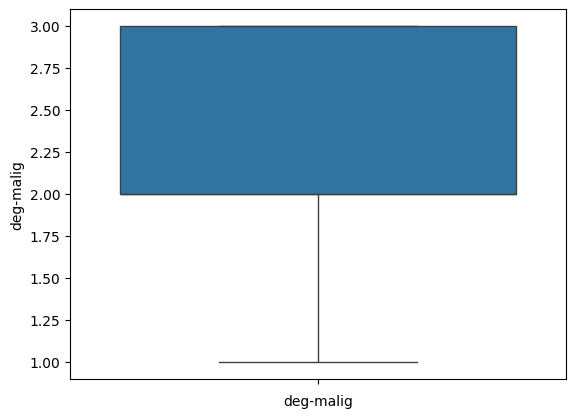

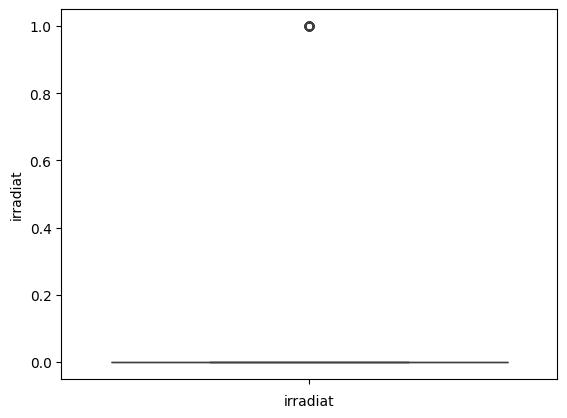

In [ ]:
for col in df.columns:
  if df[col].dtype!="object":
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.show()

In [ ]:
df.columns

Index(['age', 'mefalsepause', 'tumor-size', 'inv-falsedes', 'falsede-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat', 'class'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
  if df[col].dtype=="object" or df[col].dtype=="bool":
    df[col]=le.fit_transform(df[col])




In [ ]:
df

,age,mefalsepause,tumor-size,inv-falsedes,falsede-caps,deg-malig,breast,breast-quad,irradiat,class
0,2,2,2,0,1,3,1,2,0,1
1,3,0,2,0,0,1,1,0,0,0
2,3,0,6,0,0,2,0,1,0,1
3,2,2,6,0,1,3,1,1,1,0
4,2,2,5,4,1,2,0,4,0,1
...,...,...,...,...,...,...,...,...,...,...
267,3,0,5,5,1,2,0,1,0,0
268,3,2,4,4,1,2,0,1,1,0
269,1,2,5,5,1,2,1,4,0,0
270,3,2,2,0,0,2,1,1,0,0


In [ ]:
x=df.drop("class",axis=1)
y=df["class"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_predict=dt.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,y_predict)*100
accu

72.72727272727273

In [ ]:
depth=[1,2,3,4,5,6,7,8,9,10]
for i in depth:
  dt=DecisionTreeClassifier(max_depth=i)
  dt.fit(x_train,y_train)
  y_predict=dt.predict(x_test)
  accu=accuracy_score(y_test,y_predict)*100
  print(f"max depth is ",i,accu,"accuracy score ")



max depth is  1 66.66666666666666 accuracy score 
max depth is  2 78.78787878787878 accuracy score 
max depth is  3 77.27272727272727 accuracy score 
max depth is  4 72.72727272727273 accuracy score 
max depth is  5 74.24242424242425 accuracy score 
max depth is  6 72.72727272727273 accuracy score 
max depth is  7 66.66666666666666 accuracy score 
max depth is  8 66.66666666666666 accuracy score 
max depth is  9 65.15151515151516 accuracy score 
max depth is  10 65.15151515151516 accuracy score 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_predict=dt.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accu=accuracy_score(y_test,y_predict)*100
accu

77.27272727272727

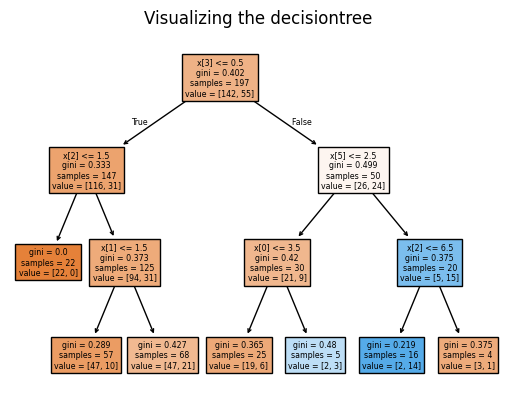

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt,filled=True)
plt.title("Visualizing the decisiontree")
plt.show()

In [ ]:
x=df.drop("class",axis=1)
y=df["class"]

In [ ]:
vif_data=pd.DataFrame()
vif_data["feature"]=x.columns

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_values=[]
for i in range(len(x.columns)):
  vif=variance_inflation_factor(x.values,i)
  vif_values.append(vif)
vif_data["VIF_values"]=vif_values

In [ ]:
vif_data

,feature,VIF_values
0,age,5.887250
1,mefalsepause,2.391005
2,tumor-size,4.639658
3,inv-falsedes,2.446081
4,falsede-caps,2.361400
5,deg-malig,7.854955
6,breast,2.027529
7,breast-quad,3.894821
8,irradiat,1.528143


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_predict=lgr.predict(x_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_predict)*100
acc

69.81132075471697